# Preparing the Slingshot (cont.)
(João Palma - Master GreenDS)
ipynb - stands for **I**teractive **PY**thon **N**ote**B**ook

# Pandas

Reference: https://pandas.pydata.org/docs/reference/index.html

## Read Dataset

### Group by

In [ ]:
import pandas as pd
Current = pd.read_csv('Climate_hisafe_knmievaluation_daily_from_01-01-1981_to_31-12-2010.csv', skiprows=[0])
#print(Current.to_string()) 

#Create a subset (new dataset)
Current1991_2010_nd=Current[(Current["Year"] >= 1991) & (Current["Year"] <= 2010)]
#same as
#Calculating monthly averages
avg_y=Current1991_2010_nd.groupby(['Day','Month']).mean()
#print (avg_y.to_string()) 

avg_m=Current1991_2010_nd.groupby(['Month']).mean()
#print (avg_m.to_string()) 


In [ ]:
#visualize series of a dataframe
import matplotlib.pyplot as plt
plt.figure()
#series we want to plot from dataframe
avg_m['tasmax'].plot(label='Max Temp', color='orange')
avg_m['tasmin'].plot(label='Min Temp', color='blue')

# adding title to the plot
plt.title('Average Temperatures 1981-2010')
# adding Label to the x-axis
plt.xlabel('Month')
# adding Label to the y-axis
plt.ylabel('°C')
# adding legend to the curves
plt.legend()

# (see options for .plot @ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

21.297565144162146


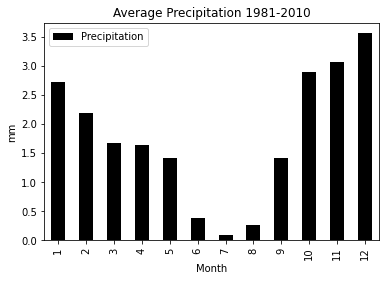

In [69]:
#Plotting precipitation
#visualize series of a dataframe
import matplotlib.pyplot as plt
plt.figure()
avg_m['pr'].plot.bar(label='Precipitation', color='black', linestyle='dashed')
# adding title to the plot
plt.title('Average Precipitation 1981-2010')
# adding Label to the x-axis
plt.xlabel('Month')
# adding Label to the y-axis
plt.ylabel('mm')

# adding legend to the curves
plt.legend()

# does this chart makes sense? Think about the data! Data has a meaning...
print (avg_m['pr'].sum())


In [70]:
#how about precipitation? it is not the average, but rather accumulation of precipitation
#sum the rain per month and divide per number of years
sum_m=Current1991_2010_nd.groupby(['Month']).sum()/20 # 20 years of data
#print (sum_m)
# or if you don't know the number of years, you could count the unique number of the "Year" field
nr_years = Current1991_2010_nd['Year'].nunique()
print (nr_years)
sum_m=Current1991_2010_nd.groupby(['Month']).sum()/Current1991_2010_nd['Year'].nunique()


20


647.7090000000001


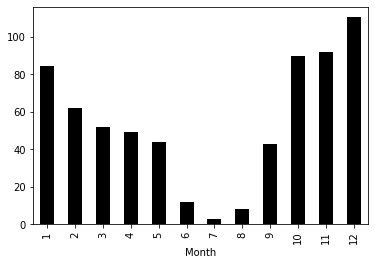

In [71]:
#plot it 
sum_m['pr'].plot.bar(label='Precipitation', color='black', linestyle='dashed')
print (sum_m['pr'].sum()) # sum of precipitation is not from Atacama desert anymore! Makes more sense 